<a href="https://colab.research.google.com/github/diksha0602/DeepLearning/blob/main/Classification(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#21BAI1777
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#create classification dataset using make_moons
X,y = make_moons(n_samples=1000,noise = 0.2, random_state=42)

In [ ]:
#lets see how our dataset looks
X

array([[-0.11166654,  0.52022374],
       [ 1.14264982, -0.34257734],
       [ 0.79555796, -0.01144231],
       ...,
       [ 1.72760808, -0.42882943],
       [-1.01448644,  0.13522904],
       [ 0.77438101,  0.63428493]])

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
#binary classification
#to visualise the dataset we require it to be in dataframes
import pandas as pd
df = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y[:]})
df.head()

,X0,X1,label
0,-0.111667,0.520224,1
1,1.142650,-0.342577,1
2,0.795558,-0.011442,1
3,0.111827,-0.551932,1
4,-0.816466,0.543996,0


In [ ]:
#the number of labels
df.label.value_counts()

1    500
0    500
Name: label, dtype: int64

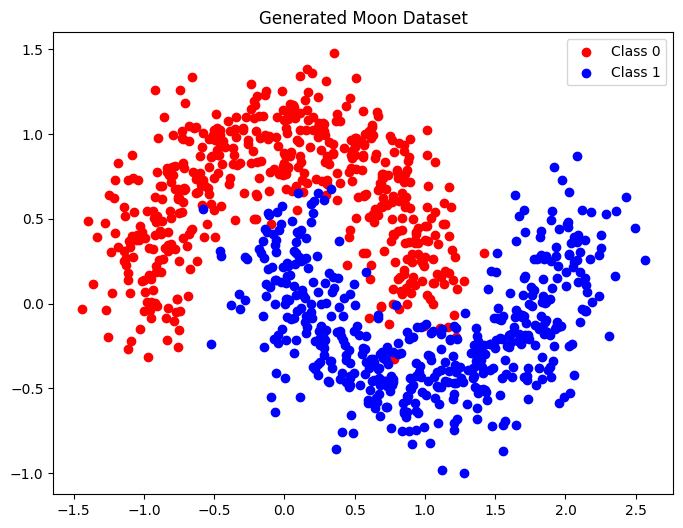

In [ ]:
#Visualise the dataset
plt.figure(figsize=(8,6))
plt.scatter(X[y==0][:,0],X[y==0][:,1],color='red',label='Class 0') #the X whose y==0
plt.scatter(X[y==1][:,0],X[y==1][:,1],color='blue',label='Class 1')
plt.title('Generated Moon Dataset')
plt.legend()
plt.show()

In [ ]:
#checking the shapes of the dataset
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
X[0],y[0]

(array([-0.11166654,  0.52022374]), 1)

In [ ]:
#split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [ ]:
#Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
#Building the model
#set random seed
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu',input_shape=(2,)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')#output layer
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy']) #classification specific loss and metrics

In [ ]:
model.fit(X_train_scaled,y_train,epochs=100,batch_size=32,validation_data=(X_test_scaled,y_test))

Epoch 1/100
25/25 [==============================] - 2s 14ms/step - loss: 0.5597 - accuracy: 0.8050 - val_loss: 0.4562 - val_accuracy: 0.8550
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3806 - accuracy: 0.8662 - val_loss: 0.3309 - val_accuracy: 0.8750
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3022 - accuracy: 0.8712 - val_loss: 0.2901 - val_accuracy: 0.8700
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.2822 - accuracy: 0.8763 - val_loss: 0.2777 - val_accuracy: 0.8700
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.2738 - accuracy: 0.8775 - val_loss: 0.2670 - val_accuracy: 0.8750
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.2639 - accuracy: 0.8838 - val_loss: 0.2564 - val_accuracy: 0.8900
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.2552 - accuracy: 0.8838 - val_loss: 0.2459 - val_accuracy: 0.8900
Epoch 8/100


In [ ]:
#Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0442 - accuracy: 0.9750


In [ ]:
test_loss

0.04416564106941223

In [ ]:
print(f"Test accuracy: {test_accuracy}")

Test accuracy: 0.9750000238418579


#MODEL:2

In [ ]:
#set random seed
tf.random.set_seed(42)

In [ ]:
#build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu',input_shape=(2,)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')#output layer
])

In [ ]:
#compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history2=model_2.fit(X_train_scaled,y_train,epochs=200,batch_size=16,validation_data=(X_test_scaled,y_test))

Epoch 1/200
50/50 [==============================] - 2s 18ms/step - loss: 0.4029 - accuracy: 0.8462 - val_loss: 0.2895 - val_accuracy: 0.8650
Epoch 2/200
50/50 [==============================] - 0s 3ms/step - loss: 0.2756 - accuracy: 0.8712 - val_loss: 0.2652 - val_accuracy: 0.8800
Epoch 3/200
50/50 [==============================] - 0s 3ms/step - loss: 0.2542 - accuracy: 0.8800 - val_loss: 0.2347 - val_accuracy: 0.8900
Epoch 4/200
50/50 [==============================] - 0s 3ms/step - loss: 0.2244 - accuracy: 0.9038 - val_loss: 0.2029 - val_accuracy: 0.8950
Epoch 5/200
50/50 [==============================] - 0s 4ms/step - loss: 0.1963 - accuracy: 0.9162 - val_loss: 0.1594 - val_accuracy: 0.9450
Epoch 6/200
50/50 [==============================] - 0s 3ms/step - loss: 0.1616 - accuracy: 0.9362 - val_loss: 0.1287 - val_accuracy: 0.9500
Epoch 7/200
50/50 [==============================] - 0s 4ms/step - loss: 0.1349 - accuracy: 0.9525 - val_loss: 0.1028 - val_accuracy: 0.9750
Epoch 8/200


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
loss2,accuracy2 = model_2.evaluate(X_test_scaled,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.9850


In [ ]:
loss2

0.04190016910433769

In [ ]:
print(f"Test accuracy for model 2 is:{accuracy2}")

Test accuracy for model 2 is:0.9850000143051147


#MODEL:3


In [ ]:
#set random seed
tf.random.set_seed(42)

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu',input_shape=(2,)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')#output layer
])

In [ ]:
model_3.compile(optimizer = tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

In [ ]:
history3 = model_3.fit(X_train_scaled,y_train,epochs=150,batch_size=4,validation_data=(X_test_scaled,y_test))

Epoch 1/150
200/200 [==============================] - 4s 7ms/step - loss: 0.4275 - accuracy: 0.8350 - val_loss: 0.2909 - val_accuracy: 0.8600
Epoch 2/150
200/200 [==============================] - 0s 2ms/step - loss: 0.2780 - accuracy: 0.8750 - val_loss: 0.2699 - val_accuracy: 0.8800
Epoch 3/150
200/200 [==============================] - 1s 3ms/step - loss: 0.2624 - accuracy: 0.8763 - val_loss: 0.2448 - val_accuracy: 0.8850
Epoch 4/150
200/200 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.8950 - val_loss: 0.2151 - val_accuracy: 0.8950
Epoch 5/150
200/200 [==============================] - 1s 3ms/step - loss: 0.2099 - accuracy: 0.9050 - val_loss: 0.1807 - val_accuracy: 0.9250
Epoch 6/150
200/200 [==============================] - 1s 3ms/step - loss: 0.1812 - accuracy: 0.9275 - val_loss: 0.1514 - val_accuracy: 0.9400
Epoch 7/150
200/200 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9375 - val_loss: 0.1249 - val_accuracy: 0.9750

In [ ]:
loss3,accuracy3=model_3.evaluate(X_test_scaled,y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.0396 - accuracy: 0.9800


In [ ]:
print(f"Test accuracy for Model: 3 is {accuracy3}")

Test accuracy for Model: 3 is 0.9800000190734863


In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
#Comparing the results of all 3 models
model_results = [["model_1",test_loss,test_accuracy],
                 ["model_2",loss2,accuracy2],
                 ["model_3",loss3,accuracy3]

]

In [ ]:
all_results = pd.DataFrame(model_results, columns=["model_name", "Loss", "Accuracy"])
all_results

,model_name,Loss,Accuracy
0,model_1,0.044166,0.975
1,model_2,0.041900,0.985
2,model_3,0.039630,0.980


313/313 [==============================] - 1s 4ms/step
doing binary classifcation...


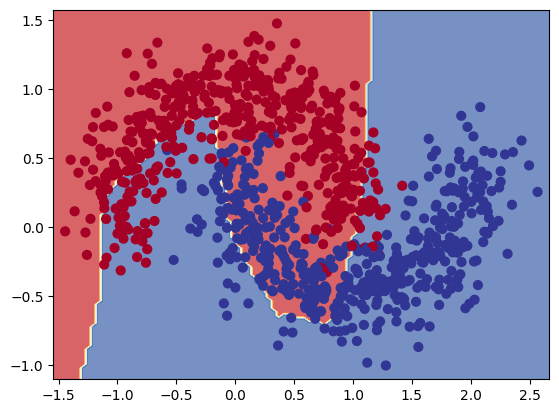

In [ ]:
#plotting the decision boundary for model_2
plot_decision_boundary(model_2, X, y)